# Bike Sharing Demand

Reading the data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/hour.csv")
print(df.head())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]


In [ ]:
#Renaming the columns
df = df.rename({"instant":"index","yr":"year","dteday":"date","mnth":"month","hr":"hour","cnt":"Demand"},axis=1)


EDA & Feature Engineering

In [ ]:
#Feature Selection

df = df.drop(["index","date","casual","registered"],axis=1)
# I have droped the casual and registered because they both mean the demand

Checking for missing values

In [ ]:
null = df.isnull().sum().any()
print(null)
# As we can see there are no missing values

False


Visualising the data

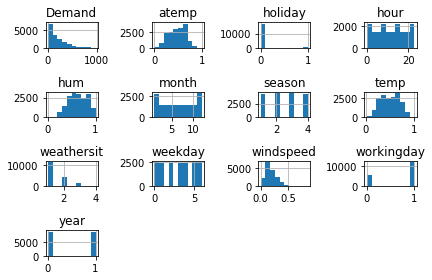

In [ ]:
hist = df.hist()
plt.tight_layout()
#we can see Demand is not normally distributed

Visualization of  the continous features vs demand

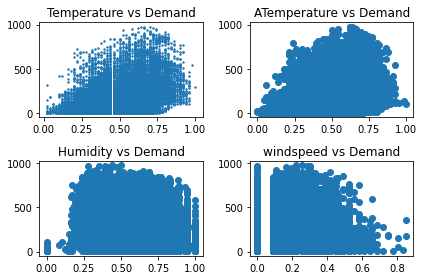

"By plotting this visualisation  we can see that temp and atemp have a very similar\ncorrelation, but we shouldn't make the decision of multicollinearity yet we should \ncheck for pearson correlation to see if it should be dropped or not"

In [ ]:

plt.subplot(2,2,1)
plt.title("Temperature vs Demand")
plt.scatter(df["temp"],df["Demand"],s=2)


plt.subplot(2,2,2)
plt.title("ATemperature vs Demand")
plt.scatter(df["atemp"],df["Demand"])

plt.subplot(2,2,3)
plt.title("Humidity vs Demand")
plt.scatter(df["hum"],df["Demand"])

plt.subplot(2,2,4)
plt.title("windspeed vs Demand")
plt.scatter(df["windspeed"],df["Demand"])
plt.tight_layout()

plt.show()
"""By plotting this visualisation  we can see that temp and atemp have a very similar
correlation, but we shouldn't make the decision of multicollinearity yet we should 
check for pearson correlation to see if it should be dropped or not"""


Text(0.5, 1.0, 'Average Demand Per Hour')

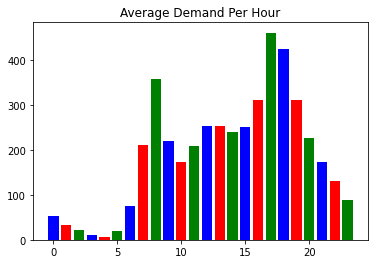

In [ ]:
#Now lets find what hour people rent bike the most

colors = ["b","r","g"]
unq_hour = df["hour"].unique()
avg_sea_dem = df.groupby("hour").mean()["Demand"]
plt.bar(unq_hour,avg_sea_dem,color = colors)
plt.title("Average Demand Per Hour")
#We can say that people prefer the morning and evening times for renting bike



visualising the categorical features w.r.t the average Demand per supply

"We can see that the Demand doesn't have much to do with the - day of the week(Weekday) and the Workingday  so it will be better if we drop this features.\nwe can also see that the demand per year has  a trend but the problem is that its limited to two years and -we dont know how the trend will be for other years\nso its better if the year isn't considered for now..*Based on our visualisation we can also see that Spring Season has got relatively lower Demand."

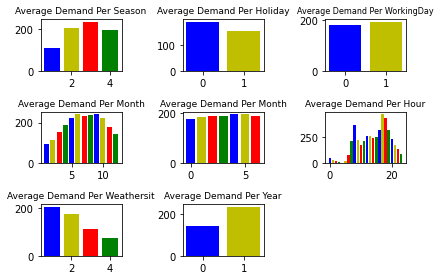

In [ ]:


colors = ["b","y","r","g"]
plt.subplot(3,3,1)
unq_sea = df["season"].unique()
avg_sea_dem = df.groupby("season").mean()["Demand"]
plt.bar(unq_sea,avg_sea_dem,color = colors )
plt.title("Average Demand Per Season",fontsize = 9)


plt.subplot(3,3,2)
unq_hol = df["holiday"].unique()
avg_sea_dem = df.groupby("holiday").mean()["Demand"]
plt.bar(unq_hol,avg_sea_dem,color = colors )
plt.title("Average Demand Per Holiday",fontsize = 9)

plt.subplot(3,3,3)
unq_work = df["workingday"].unique()
avg_sea_dem = df.groupby("workingday").mean()["Demand"]
plt.bar(unq_work,avg_sea_dem,color = colors )
plt.title("Average Demand Per WorkingDay",fontsize = 8)

plt.subplot(3,3,4)
unq_mon = df["month"].unique()
avg_sea_dem = df.groupby("month").mean()["Demand"]
plt.bar(unq_mon,avg_sea_dem,color = colors )
plt.title("Average Demand Per Month",fontsize = 9)

plt.subplot(3,3,5)
unq_week = df["weekday"].unique()
unq_week.sort()
avg_sea_dem = df.groupby("weekday").mean()["Demand"]
plt.bar(unq_week,avg_sea_dem,color = colors)
plt.title("Average Demand Per Month",fontsize = 9)

plt.subplot(3,3,6)
unq_hour = df["hour"].unique()
avg_sea_dem = df.groupby("hour").mean()["Demand"]
plt.bar(unq_hour,avg_sea_dem,color = colors)
plt.title("Average Demand Per Hour",fontsize = 9)

plt.subplot(3,3,7)
unq_wea = df["weathersit"].unique()
avg_sea_dem = df.groupby("weathersit").mean()["Demand"]
plt.bar(unq_wea,avg_sea_dem,color = colors)
plt.title("Average Demand Per Weathersit",fontsize = 9)


plt.subplot(3,3,8)
unq_year = df["year"].unique()
avg_sea_dem = df.groupby("year").mean()["Demand"]
plt.bar(unq_year,avg_sea_dem,color = colors)
plt.title("Average Demand Per Year",fontsize = 9)

plt.tight_layout() #this splits the plots

"""We can see that the Demand doesn't have much to do with the - day of the week(Weekday) and the Workingday  so it will be better if we drop this features.
we can also see that the demand per year has  a trend but the problem is that its limited to two years and -we dont know how the trend will be for other years
so its better if the year isn't considered for now..*Based on our visualisation we can also see that Spring Season has got relatively lower Demand."""



Checking continous variable correlation and multicollinearity using heatmap

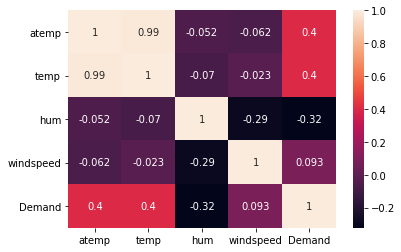

In [ ]:
import seaborn as sns

cor = df[["atemp","temp","hum","windspeed","Demand"]].corr()   
sns.heatmap(cor,annot=True)
#atemp column should be dropped because it has very high multicollinearity

In [ ]:
#dropping irrelevant columns
df = df.drop(["atemp","windspeed","weekday","workingday","year"],axis=1)

Converting the Demand variable to Gausian distribution(norminal) by applying log transformation

Text(0.5, 1.0, 'log transformation applied')

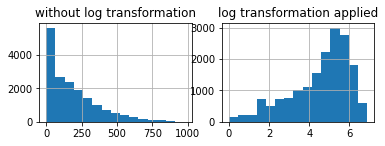

In [ ]:
import numpy as np
#converting the Demand variable to Gausian distribution(norminal) by applying log transformation
plt.subplot(2,2,1)
df["Demand"].hist(bins=15)
plt.title("without log transformation")

df["Demand"] = np.log(df["Demand"])
plt.subplot(2,2,2)
df["Demand"].hist(bins=15)
plt.title("log transformation applied")


Using Cross Validation to find the algorithm that gives the best performance

Importing warning 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
x = df.drop("Demand",axis=1)
y = df["Demand"]

import xgboost as xgb
from sklearn.ensemble import forest 
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statistics as stats




In [ ]:
xg = xgb.XGBRegressor() 
fo =  forest.RandomForestRegressor()
tr = tree.DecisionTreeRegressor()
lin = linear_model.LinearRegression()

xgb_score = cross_val_score(xg,x,y)
ran_score = cross_val_score(fo,x,y)
dtree_score = cross_val_score(tr,x,y)
log_score = cross_val_score(lin,x,y)

df_score = pd.DataFrame({"model":["XGBRegressor","RandomForestRegressor","DecisionTreeRegressor","LinearRegression"],"score":[stats.mean(xgb_score),stats.mean(ran_score),stats.mean(dtree_score),stats.mean(log_score)]})
print(df_score)

[16:05:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                   model     score
0           XGBRegressor  0.718975
1  RandomForestRegressor  0.677655
2  DecisionTreeRegressor  0.518100
3       LinearRegression  0.363089


In [ ]:
#Spltting the dataframe into training and testing sample of 80% and 20% respectively.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
# # !pip install scikit-optimize
# import numpy as np
# from skopt import BayesSearchCV
# from sklearn.model_selection import GridSearchCV
# warnings.filterwarnings("ignore")

# #Optimizing Parameters
# model = xgb.XGBRegressor()
# param = {"max_depth":[3,4,5,8,9],"subsample":[0.6,0.7,1.0],"colsample_bytree":[0.6,0.9,1.0],"min_child_weight":[1,2,3,6,1],"learning_rate":[0.01,0.1,1.0,0.3,0.5]}
# #search = BayesSearchCV(model,param)
# search = GridSearchCV(model,param)
# Bayes_search = search.fit(x_train,y_train)
# print(Bayes_search.best_params_)



In [ ]:
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings("ignore")

model = xgb.XGBRegressor(colsample_bytree=0.9,learning_rate=0.2,max_depth=7,min_child_weight=2,subsample=1.0)
model = model.fit(x_train,y_train)
tst_score = model.score(x_test,y_test)
tr_score = model.score(x_train,y_train)
print(f'test score = {tst_score},train score = {tr_score}')
##original score = 0.8016637982351097
#root mean squared error
#ypred = model.predict(x_test)
# metric = math.sqrt(mean_squared_error(y_test,ypred))
# print(metric)



[16:05:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
test score = 0.8141466920278808,train score = 0.8932542693979637
